## Ridge Regression and LASSO Regression with Synthetic Data

Let’s generate a synthetic dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# define function that creates synthetic data
def createData(n, range, noiseLevel, beta):
    b0 = beta[0]
    b1 = beta[1]
    b2 = beta[2]
    b3 = beta[3]
    b4 = beta[4]
    b5 = beta[5]  
    
    x1 = np.random.uniform(-range, range, n);
    x2 = np.random.uniform(-range, range, n);
    x3 = x1*x2;
    x4 = x1**2;
    x5 = x2**2;

    noise = np.random.normal(-noiseLevel, noiseLevel, n)
    y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + noise;

    X = np.vstack((x1, x2, x3, x4, x5)).T

    return X, y

In [3]:
# create synthetic data set
n = 1000;
range = 10;
noiseLevel = 25;
beta = np.array([6, 5, 4, 3, 2, 0])
X, y = createData(n, range, noiseLevel, beta)

In [4]:
print('Shape of X is ', X.shape)
print(X.shape[0])
print(X)

Shape of X is  (1000, 5)
1000
[[ 5.62076849  1.42112932  7.98783889 31.59303837  2.01960854]
 [-5.49699103  0.43571086 -2.39509869 30.21691039  0.18984395]
 [-1.49590873 -4.45623765  6.66612482  2.23774294 19.85805397]
 ...
 [ 9.4259057   8.16123924 76.92707151 88.84769825 66.60582601]
 [-0.52544003  1.49875381 -0.78750524  0.27608722  2.24626298]
 [-1.80228146  4.06669726 -7.32933309  3.24821847 16.53802663]]


In [5]:
print('Shape of Y is ', y.shape)
print()
print(y)

Shape of Y is  (1000,)

[ 1.46721843e+02 -3.34507272e+01 -2.80730295e+01  2.79716663e+01
  1.23138470e+02  2.06484383e+02  2.50083777e+02 -5.50452226e+01
  3.17528768e+01 -6.66225786e+01  2.18879219e+00  1.95810404e+02
 -1.98046404e+01  2.60711467e+01  4.19402537e+01  1.91798523e+02
 -4.43085515e+01 -3.81145616e+01  1.99517228e+02  1.70642450e+02
 -1.20466620e+02 -4.59952917e+01 -3.63000129e+01 -1.95602782e+01
  3.84281327e+01 -1.74849557e+01  7.95039640e+01 -2.21922851e+01
 -4.94257753e+01  2.04386726e+02 -2.99467150e+00 -1.58533918e+01
  2.88110481e+01  3.08431217e+02  1.61770881e+02  6.83669559e+00
 -1.21724923e+02 -3.28220807e+01  3.32559279e+02 -4.49647185e+00
  1.56087761e+01  3.55759973e+02 -2.41592932e-01  2.51517860e+01
 -7.73936909e+01  1.00219479e+02  1.15832893e+02  2.72067513e+01
  2.66472230e+02  8.32546988e+01  5.99759575e+01 -5.04110636e+01
  1.60847967e+02  8.89539946e+01  5.97178471e+01  1.25833081e+02
 -3.95512317e+01  3.60974850e+01 -1.14264732e+02 -5.99627763e-01
 

# Ridge Regression

In [6]:
from sklearn.preprocessing import StandardScaler

# Ridge Regression function
def ridgeRegression(X, y, alpha, biasRegularization, normalizeData): 

    if (normalizeData == True):
        # (note that, scaling is crucial for regularized linear regression models)
        X = StandardScaler().fit_transform(X)

    #n = number of rows in X    
    n=X.shape[0]
    
    # add ones to the left of x
    X = np.c_[np.ones((n,1)), X]

    #p = number of columns in X     
    p=X.shape[1]
    
    #D = is a diagonal matrix in size (p x p), Dj is j_th element in diagonal
    D=np.zeros((p, p))
    np.fill_diagonal(D, 1)
    """
    for j in range(p):
        if biasRegularization == False and j==0:
            D[j][j]=0
        elif biasRegularization == False and j>=1:
            D[j][j]=1
        else:
            D[j][j]=1
    """
    I = np.identity(p)
    D=I
    
    # solve for w
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + alpha * D), X.T), y)
    
    return w    

<IPython.core.display.Javascript object>


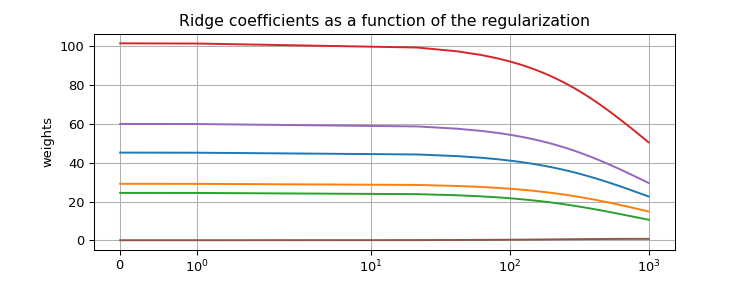

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

ridge_alphas = np.hstack((np.linspace(0, 1, 10), np.linspace(1, 1000)))

# create ridge paths 

ridge_coefs=[]
X_new = np.c_[np.ones((n,1)), X]

for alpha in ridge_alphas:
    w=ridgeRegression(X, y, alpha, True, True)
    ridge_coefs.append(w)
    

# show ridge paths

plt.figure(1, figsize=(8,3)) 
plt.plot(ridge_alphas, ridge_coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.xscale('symlog')
plt.grid()
plt.show()


<IPython.core.display.Javascript object>


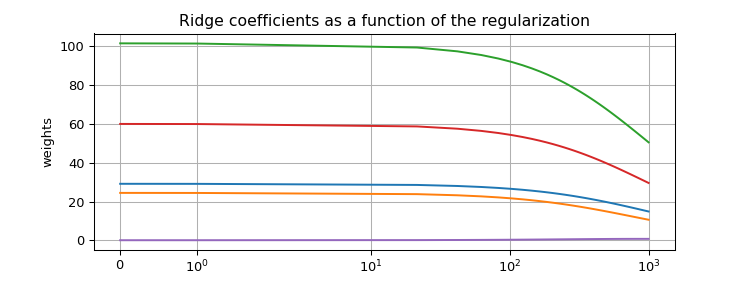

In [13]:
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')

# Find Ridge paths 
ridge_alphas = np.hstack((np.linspace(0, 1, 10), np.linspace(1, 1000)))

X_new = StandardScaler().fit_transform(X)

ridge_coefs = []
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=True, max_iter=10000)
    ridge.fit(X_new, y)
    ridge_coefs.append(ridge.coef_)
    
import matplotlib.pyplot as plt
%matplotlib notebook

# Show Ridge paths
plt.figure(1, figsize=(8,3)) 
plt.plot(ridge_alphas, ridge_coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.xscale('symlog')
plt.grid()
plt.show()

# LASSO Regression

In [9]:
# LASSO Regression function
def lassoRegression(X, y, alpha, biasRegularization, normalizeData, maxIteration, convergenceTolerance):

    
    if (normalizeData == True):
        # student code (note that, scaling is crucial for regularized linear regression models)
        X = StandardScaler().fit_transform(X)

    #n = number of rows in X      # student code
    n=X.shape[0]
    
    # add ones to the left of x
    X = np.c_[np.ones((n,1)), X]

    #p = number of columns in X      # student code
    p=X.shape[1]

    #w = vector with all ones with size (p x 1)
    w=np.ones(p, 1)
    #w_old = vector with all zeros with size (p x 1)
    w_old=np.zeros(p, 1)

    epsilon = 1e-3
    """
    for iteration in range(maxIteration):
        # L1-norm approximation
        L = is a diagonal matrix in size (p x p), Lj is j_th element in diagonal
        if (biasRegularization == false)
            # student code
            
        # solve for w
        w = this is the closed-form solutio for w you found in the mathematical part of the homework		# student code

        # check for convergence
        if (np.linalg.norm((w - w_old), ord=1) < convergenceTolerance)
            break;

        # keep solution for the next iteration (for convergence check)
        w_old = w;
    """
    return w

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

lasso_alphas = np.hstack((np.linspace(0, 1, 10), np.linspace(1, 1000)))

# create lasso paths 

lasso_coefs=[]
X_new = np.c_[np.ones((n,1)), X]
"""
for alpha in lasso_alphas:
    w=lassoRegression(X, y, alpha, True, True, maxIteration, convergenceTolerance)
    lasso_coefs.append(w)
    

# show lasso paths

plt.figure(1, figsize=(8,3)) 
plt.plot(lasso_alphas, lasso_coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.xscale('symlog')
plt.grid()
plt.show()
"""

"\nfor alpha in lasso_alphas:\n    w=lassoRegression(X, y, alpha, True, True, maxIteration, convergenceTolerance)\n    lasso_coefs.append(w)\n    \n\n# show lasso paths\n\nplt.figure(1, figsize=(8,3)) \nplt.plot(lasso_alphas, lasso_coefs)\nplt.xlabel('alpha')\nplt.ylabel('weights')\nplt.title('Lasso coefficients as a function of the regularization')\nplt.xscale('symlog')\nplt.grid()\nplt.show()\n"

<IPython.core.display.Javascript object>


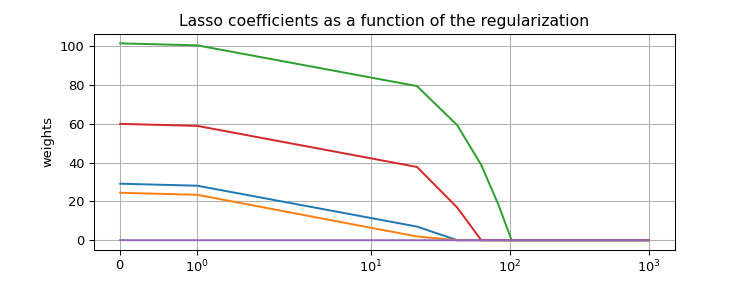

In [11]:
# Find Lasso paths 
lasso_alphas = np.hstack((np.linspace(0, 1, 10), np.linspace(1, 1000)))

X_new = StandardScaler().fit_transform(X)

lasso_coefs = []
for a in lasso_alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True, max_iter=10000)
    lasso.fit(X_new, y)
    lasso_coefs.append(lasso.coef_)
    
import matplotlib.pyplot as plt
%matplotlib notebook

# Show Lasso paths
plt.figure(1, figsize=(8,3)) 
plt.plot(lasso_alphas, lasso_coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.xscale('symlog')
plt.grid()
plt.show()